In [3]:
data_path = "/home/sthomas/projects/LB_mixing"


In [4]:
import signac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from scipy.signal import argrelextrema as argex
import matplotlib.cm as cm
import itertools

            
names={'iso':'Isothermal','lin_ramp':'Linear Ramp','step':'Step'}
colors={'iso':'C0','lin_ramp':'C1','step':'C2'}
markers={'iso':'s','lin_ramp':'P','step':'>'}
linestyles={'iso':'-','lin_ramp':'--','step':'-.'}

project = signac.get_project(data_path)
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)
df = df.sort_values('T')

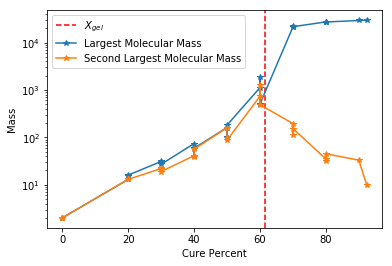

In [5]:
df_filtered = df[(df.bond==True)]
df_sorted = df_filtered.sort_values('cure_percent')
df_100 = df_filtered[df_filtered.stop_after_percent>80]

plt.axvline(x=df_100['curing_at_gel_point'][0],
            color='r',
            linestyle='--',
           label='$X_{gel}$')
plt.plot(df_sorted['cure_percent'],
         df_sorted['largest_network'],
         marker='*',
         label='Largest Molecular Mass')
plt.plot(df_sorted['cure_percent'],
         df_sorted['second_largest_network'],
         marker='*',
         label='Second Largest Molecular Mass')
plt.yscale('log')
plt.xlabel('Cure Percent')
plt.ylabel('Mass')
plt.legend(fontsize=10)